# Wirtschaftssimulation

Dies ist eine Simulation eines Wirtschaftsmarktes, in dem eine Population von Akteuren mit jeweils hohem Vermögen vorkommt. In jedem Zeitschritt beteiligen sich zwei Akteure (ausgewählt durch eine Interaktionsfunktion) an einer Transaktion, die (gemäß einer Transaktionsfunktion) Geld zwischen ihnen austauscht. Die Idee ist, die Entwicklung des Vermögens der Bevölkerung im Laufe der Zeit zu verstehen.

<img src="img/money-exchange.jpg" alt="Transaktion" style="width: 400px;"/>

## Warum ist das interessant?
* Es ist ein Beispiel für die Verwendung von Simulationen zur Modellierung der Welt. Das Modell ist einfach, erfasst jedoch einige Aspekte einer komplexen Welt.
* Es zeigt subtile Unterschiede zwischen rechnerischem Denken, mathematischem Denken und statistischem Denken.
*  Vorurteile darüber, wie Volkswirtschaften funktionieren, können durch die hier gezeigten Ergebnisse in Frage gestellt werden.

## Bevölkerungsverteilung

Wir werden eine Population als eine Liste von N Zahlen modellieren, wobei jede Zahl das Vermögen eines Akteurs darstellt. Wir beginnen mit einer [Normalverteilung](https://de.wikipedia.org/wiki/Normalverteilung) mit einem mittleren Vermögen von 100 [Simoleons](https://en.wiktionary.org/wiki/simoleon) und einer [Standardabweichung](https://de.wikipedia.org/wiki/Varianz_(Stochastik)) von 1/5 des Mittelwert.

In [5]:
import random

N  = 5000 # Default size of the population
MU = 100. # Default mean of the population

population = [random.gauss(mu=MU, sigma=MU/5) for actor in range(N)]

## Bevölkerungsstatistik und Visualisierung¶

Wie gleichmäßig ist das Vermögen in einer Bevölkerung verteilt? Das traditionelle Maß ist der [Gini-Koeffizient](https://de.wikipedia.org/wiki/Gini-Koeffizient). Diese kann anhand folgender Formel berechnet werden (wobei davon ausgegangen wird, dass die y-Werte sortiert sind):

$G=\frac{2\sum_{i=1}^{n}{iy_i}}{n\sum_{i=1}^{n}{y_i}}-\frac{n+1}{n}$


Ein Gini-Index von 0 bedeutet völlige Gleichheit (jeder hat das gleiche Vermögen). Werte, die näher an 1 liegen, bedeuten mehr Ungleichheit (der größte Teil des Vermögens liegt in den Händen einiger weniger Personen). Hier ist eine Tabelle mit Gini-Koeffizienten für verschiedene Länder:

| Land   | Gini-Koeffizient|
|------------|------------------|
|Slowenien 🇸🇮|0,249|
|Deutschland 🇩🇪|0,291|
|Frankreich 🇫🇷|0,327|
|Vereinigtes Königreich 🇬🇧|0,332|
|Vereinigte Staaten 🇺🇸|0,415|
|Südafrika 🇿🇦|0,630|

Der Gini-Koeffizient wird traditionell über das Einkommen berechnet. In dieser Simulation werden wir aber den Gini-Koeffizienten für das Vermögen berechnen. Hier die Funktion zur Berechnung:

In [2]:
def gini(y):
    """
    Compute the Gini coefficient (a measure of equality/inequality) in a population, y.
    """
    y = sorted(y)
    n = len(y)
    numer = 2 * sum((i+1) * y[i] for i in range(n))
    denom = n * sum(y)
    return (numer / denom) - (n + 1) / n

Außerdem definieren wir noch eine Funktion `hist`, um ein Histogramm einer Population zu zeichnen. Unser `hist`-Funktion erweitert `matplotlib.hist` um einigen spezifische Parameter:

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

def hist(population, label='pop', **kwargs):
    """
    A custom version of `hist` with better defaults.
    """
    
    label = label + ': G=' + str(round(gini(population), 2))
    h = plt.hist(list(population), bins=30, alpha=0.5, label=label, **kwargs)
    plt.xlabel('wealth'); plt.ylabel('count'); plt.grid(True)
    plt.legend()

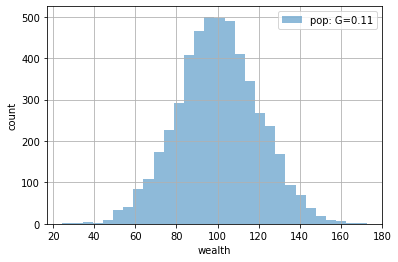

In [6]:
hist(population)

## Transaktionen¶

In einer Transaktion kommen zwei Akteure zusammen und tauschen einen Teil ihres Vermögens aus. Als erste werden wir eine vermögenserhaltende Transaktionsfunktion verwenden. Dabei wird das gesamte Vermögen beider Akteure in einen Pot gesteckt. Dieser Pot wird der dann zufällig und gleichmäßig zwischen den beiden Akteuren aufgeteilt:

In [7]:
def random_split(A, B):
    """
    Take all the money in the pot and divide it randomly between the two actors.
    """
    pot = A + B
    share = random.uniform(0, pot)
    return share, pot - share

In [9]:
random_split(500,100)

(419.3159843064606, 180.68401569353938)

## Interaktionen

Wie entscheiden wir, welche Parteien miteinander interagieren? Wir werden eine Interaktionsfunktion definieren, die aufgrund der Größe der Population zufällig zwei beliebige Akteure in der Population auswählt (angegeben durch ihre Indexnummern in der Liste). Wir werden diese Funktion als `anyone` bezeichnen. Jeder Akteur kann mit jedem anderen Akteur interagieren.


In [10]:
def anyone(N): return random.sample(range(N), 2)

In [11]:
anyone(N)

[2335, 166]

## Simulation

Die Funktion `simulate` nimmt eine gegebene Population und führt folgende Schritte aus:
1. ruft eine Funktion `interaction` zur Auswahl von zwei Akteuren auf
1. ruft eine Funktion `transaction` zur Aufteilung ihres Vermögens auf. 

Diese Schritte werden `T`-mal wiederholt. Nach jeder Transaktion gibt `simulate` die Grundgesamtheit aus. Somit liefert `simulate` den vollständigen Verlauf der Simulation.

In [12]:
def simulate(population, T, transaction=random_split, interaction=anyone):
    """
    Run simulation on population for T transactions; yield (t, pop) at each time step.
    """
    population = population.copy()
    yield population
    for t in range(1, T + 1):
        i, j = interaction(len(population))
        population[i], population[j] = transaction(population[i], population[j]) 
        yield population

Hier ist ein einfaches Beispiel für die Simulation einer Population von 4 Akteuren in 8 Zeitschritten:

In [13]:
for simulation_result_population in simulate([100] * 4, 8):
    print(simulation_result_population)

[100, 100, 100, 100]
[119.32031335229645, 80.67968664770355, 100, 100]
[80.526025451186, 80.67968664770355, 100, 138.79428790111047]
[80.526025451186, 146.90122223850102, 100, 72.57275231031298]
[80.526025451186, 158.47057651143288, 88.43064572706814, 72.57275231031298]
[9.98846230749698, 158.47057651143288, 158.96820887075717, 72.57275231031298]
[9.98846230749698, 170.30360405859054, 158.96820887075717, 60.73972476315532]
[81.34430574674394, 98.94776061934357, 158.96820887075717, 60.73972476315532]
[81.34430574674394, 119.0435639418098, 158.96820887075717, 40.64392144068909]


## Visualisierung der Simulationsergebnisse

Wenn wir größere Simulationen durchführen möchten, benötigen wir eine bessere Methode zur Visualisierung der Ergebnisse. Das ist die Aufgabe der Funktion `show`

In [14]:
import statistics

def show(population, k=40, percentiles=(1, 10, 50, 90, 99), **kwargs):
    """
    Run a simulation for k*N steps, printing statistics and displaying a plot and histogram."
    """
    N = len(population)
    start = list(population)
    results = [(t, sorted(pop)) # Sort results so that percentiles work
               for (t, pop) in enumerate(simulate(population, k * N, **kwargs))
               if t % (N / 10) == 0]
    times = [t for (t, pop) in results]
    
    # Printout:
    print('   t    Gini stdev' + (' {:3d}%' * len(percentiles)).format(*percentiles))
    print('------- ---- -----' + ' ----' * len(percentiles))
    fmt = '{:7,d} {:.2f} {:5.1f}' + ' {:4.0f}' * len(percentiles)
    for (t, pop) in results:
        if t % (4 * N) == 0:
            data = [percent(pct, pop) for pct in percentiles]
            print(fmt.format(t, gini(pop), statistics.stdev(pop), *data))
    
    # Plot:
    plt.xlabel('wealth')
    plt.ylabel('time')
    plt.grid(True)
    for pct in percentiles:
        line = [percent(pct, pop) for (t, pop) in results]
        plt.plot(line, times)
    plt.show()
    
    # Histogram:
    R = (min(pop+start), max(pop+start))
    hist(start, 'start', range=R)
    hist(pop, 'end', range=R)
                
def percent(pct, items):
    """
    The item that is pct percent through the sorted list of items.
    """
    return items[min(len(items)-1, len(items) * pct // 100)]

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.11  20.0   53   75  100  126  146
 20,000 0.49  97.5    1   12   70  230  459
 40,000 0.51 104.7    1   10   66  236  481
 60,000 0.50 100.2    1   11   69  233  448
 80,000 0.50 100.7    1   10   69  234  454
100,000 0.50 100.1    1   11   71  230  456
120,000 0.49  97.6    1   11   69  229  453
140,000 0.50 100.0    1   11   69  232  474
160,000 0.50  99.6    1   11   69  230  463
180,000 0.51 102.2    1   10   69  231  488
200,000 0.50 100.5    1   11   69  238  455


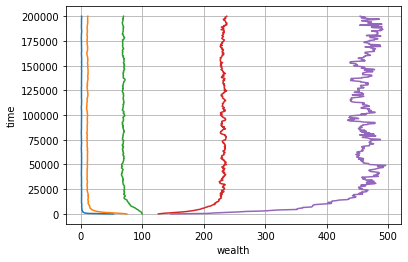

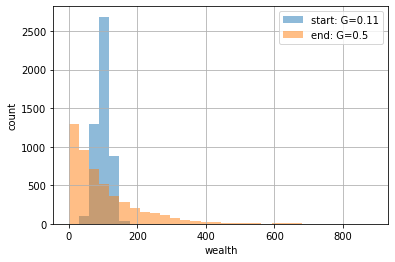

In [15]:
population = [random.gauss(mu=MU, sigma=MU/5) for actor in range(N)]
show(population)

Die oben gezeigte Ausgabe besteht aus drei Teilen:

**Tabelle:** Zeigt für die Startpopulation und jede Population nach 20.000 Transaktionen den Gini- Koeffizienten und die Standardabweichung des Vermögens. Außerdem wird der Wohlstand in folgenden Percentilen ausgegeben: 1%, 10%, 50% (Median), 90% und 99%.

**Diagramm:** Zeigt die gleichen Informationen wie die Tabelle (mit Ausnahme des Gini-Index), jedoch mit mehr Datenpunkten. Die äußerste linke (blaue) Linie ist das 1%-Percentil, die äußerste rechte (lila) das 99%-Percentil. Auf den inneren Linien befinden sich das 10%, 50% und 90%-Percentil. Die Zeit läuft in dem Diagramm von unten nach oben. Die 99%-Linie (lila) beginnt also bei etwa 150 und steigt mit der Zeit auf über 400 an. Das weist darauf hin, dass die wohlhabendsten 1% wohlhabender werden. Die Tatsache, dass die Linien nach ungefähr 25.000 Transaktionen mehr oder weniger gerade nach oben verlaufen, deutet darauf hin, dass das System konvergiert hat.

**Histogramm**: Die Start- und Endpopulationen werden als Histogramme dargestellt.

### Interpretation 
Die Ergebnisse zeigen, dass die **Ungleichheit** des Vermögens mit der Zeit **zunimmt**. Woran erkennst man das? Der Gini-Koeffizient nimmt mit der Zeit zu, die Standardabweichung nimmt zu und der Wohlstand der 1% und 10%-Percentile nimmt ab. Im Gegensatz dazu nimmt der Vermögen der 90% und 99%-Percentile zu.

Würde sich die Verteilung des Vermögens weiter verändern, wenn wir die Simulation länger laufen lassen? Es sieht so aus, als würde sich nur das 1%-Percentil ändern, die anderen Linien bleiben ziemlich stationär ab ca. T = 15.000 bis T = 25.000. Dies deutet darauf hin, dass ein längeres Ausführen der Simulation nicht zu einer anderern Verteilung des Vermögen führen würde.

## Auswirkung der Verteilung zum Beginn der Simulation

Was passiert mit dem Simulationsergebnis, wenn wir die Startpopulation variieren? Hierzu wird eine Funktion `samples` definiert, um `n` Werte von einer Verteilungsfunktion zu ziehen. Das Ergebnis wird dabei auf den angegebenen Mittelwert normiert.

In [17]:
def samples(distribution, *args, n=N, mu=MU):
    """
    Sample from the distribution n times, then normalize results to have mean mu.
    """
    numbers = [distribution(*args) for _ in range(n)]
    return normalize(numbers, mu)

def normalize(numbers, mu):
    """
    Make the numbers non-negative, and scale them so they have mean mu.
    """
    numbers = [max(0, n) for n in numbers]
    factor = len(numbers) * mu / sum(numbers)
    return [x * factor for x in numbers]

Damit kann nun leicht der Effekt verschiedener Verteilungen zu Beginn der Simluation getestet werden. Als erste starten wir mit eine Gleichverteilung:

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.34  58.6    2   19   98  182  199
 20,000 0.49  98.5    1   12   70  227  455
 40,000 0.49  98.3    1   11   72  230  466
 60,000 0.50  98.3    1   10   70  231  460
 80,000 0.50  98.7    1   10   70  234  450
100,000 0.50  99.4    1   10   70  234  459
120,000 0.50 100.7    1   10   69  232  459
140,000 0.50 100.3    1   10   69  233  463
160,000 0.50  99.8    1   11   70  228  452
180,000 0.49  98.2    1   11   70  230  450
200,000 0.50 100.9    1   11   69  228  486


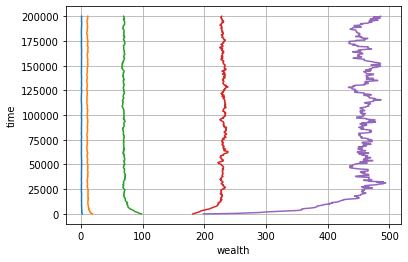

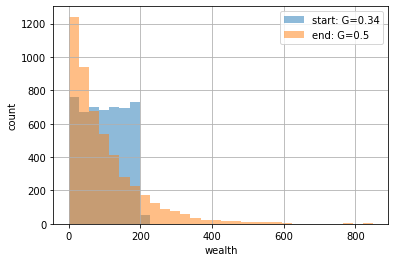

In [18]:
show(samples(random.uniform,0,200))

Als nächste mit einem konstanten Vermögen.

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.00   0.0  100  100  100  100  100
 20,000 0.49  96.5    1   11   71  224  451
 40,000 0.50 100.4    1   11   69  230  472
 60,000 0.50  98.7    1   11   70  230  463
 80,000 0.50  98.8    1   10   70  232  449
100,000 0.50 100.3    1   10   70  231  466
120,000 0.50  99.6    1   11   70  234  456
140,000 0.50  98.3    1   11   71  229  456
160,000 0.50 101.1    1   10   70  226  476
180,000 0.50 100.8    1   11   68  231  458
200,000 0.49  97.0    1   10   72  230  435


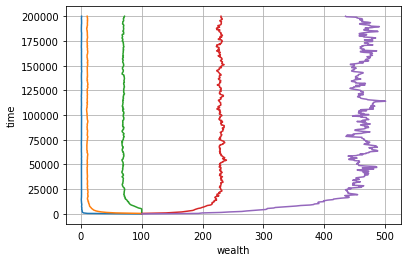

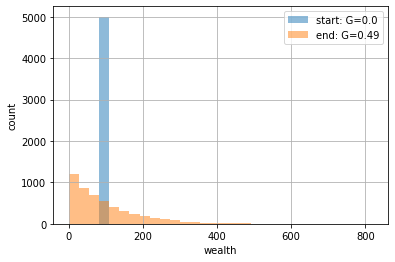

In [15]:
def constant(mu=MU): return mu

show(samples(constant))

Das resultierende Histogramm sieht anders aus. Der Grund dafür ist aber nur, dass die Startverteilung so schmal und hoch ist. Die Endverteilung hat einen Gini-Koeffizienten von ungefähr 1/2 und eine Standardabweichung von ungefähr 100, genau wie wir es von den anderen Startverteilungen kennen.

Als nächste die Betaverteilung (mit sorgfältig ausgewählten Parametern):

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.50  97.9    1    9   69  234  428
 20,000 0.50 100.2    1   11   69  228  468
 40,000 0.50  99.9    1   11   69  232  452
 60,000 0.50  98.5    1   10   69  230  438
 80,000 0.50  99.7    1   11   69  230  459
100,000 0.50 100.6    1   11   69  230  474
120,000 0.51 103.4    1   10   69  230  474
140,000 0.50  99.4    1   11   69  234  452
160,000 0.50 100.1    1   10   69  232  451
180,000 0.49  98.2    1   11   71  228  459
200,000 0.50 101.6    1   11   68  232  475


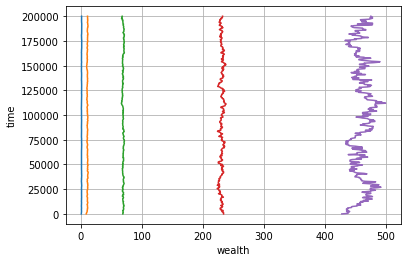

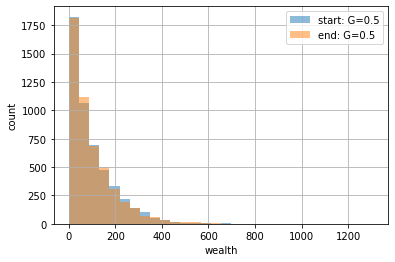

In [19]:
def beta(): return random.betavariate(0.9, 12)
    
show(samples(beta))

## Interpretation
**Überraschung:** Wir können bestätigen, dass die Startpopulation nicht viel ausmacht. Die Simulation hat gezeigt, dass drei sehr unterschiedliche Startpopulationen - Gauß, Uniform und Beta - alle sehr ähnliche Endpopulationen aufwiesen. In allen drei Fällen ergab sich ein G um 1/2 und Standardabweichung um 100. Die endgültige Verteilung in allen drei Fällen ähnelt der normalisierten Beta-Verteilung (0,9, 12).

## Auswirkung der Transaktionsfunktion

Hat die Transaktionsfunktion einen Einfluss auf das Ergebnis? Bisher haben wir nur die Transaktionsfunktion `random_split` verwendet. Wir vergleichen dies nun mit der Funktion `winner_take_all`, bei der das Vermögen beider Schauspieler in einen Topf geworfen wird und einer von ihnen alles nimmt:

In [17]:
def winner_take_all(A, B): 
    return random.choice(([A + B, 0], [0, A + B]))

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.11  19.8   53   75  100  126  146
 20,000 0.89 278.6    0    0    0  375 1399
 40,000 0.94 392.8    0    0    0  117 2064
 60,000 0.96 487.9    0    0    0    0 2435
 80,000 0.97 562.1    0    0    0    0 2638
100,000 0.98 649.8    0    0    0    0 3123
120,000 0.98 717.4    0    0    0    0 3220
140,000 0.98 763.6    0    0    0    0 3251
160,000 0.98 794.1    0    0    0    0 3496
180,000 0.99 835.9    0    0    0    0 3449
200,000 0.99 892.4    0    0    0    0 3343


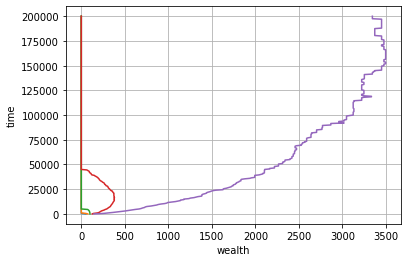

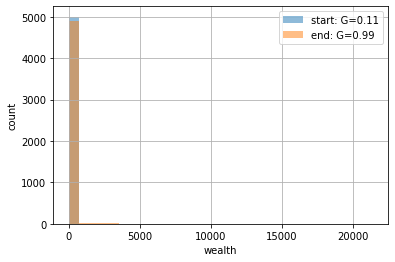

In [18]:
show(samples(random.gauss, MU, MU/5), transaction=winner_take_all)

Jetzt sehen die Ergebnisse deutlich anders aus. Der Großteil des Vermögens geht zum 99%-Perzentil. Der Gini-Koeffizient reicht bis zu 0,99 und die Standardabweichung beträgt über 800 und steigt weiter an.

Dieses Ergebnis macht auch durchaus Sinn. Jedes Mal, wenn zwei Akteure mit einem Vermögen ungleich 0 interagieren, endet einer mit 0. Die Anzahl der Akteure mit einem Vermögen von 0 steigt also monoton an. Dies passiert so lange bis das gesamte Vermögen bei einem Akteur liegt. Von da an wird das Vermögen nur noch herumgetauscht.

Als nächstes testen wir eine andere Transaktionsfunktion. Bei jeder Transaktion werden die beide Parteien mit 22% (dem durchschnittlichen Einkommensteuersatz in den DE) besteuert. Die Steuereinnahmen werden dann gleichmäßig auf die beiden Parteien aufteilt. Der steuerfreie Teil wird mit `random_split` aufgeteilt:

In [19]:
def redistribute(A, B, rate=0.22):
    """
    Tax both parties at rate; split the tax revenue evenly, and randomly split the rest.
    """
    tax = rate * (A + B)
    Arand, Brand = random_split(A + B - tax, 0)
    return tax / 2 + Arand, tax / 2 + Brand

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.11  20.2   53   74  100  126  147
 20,000 0.38  70.8   12   29   83  198  333
 40,000 0.38  72.3   12   28   81  202  340
 60,000 0.38  70.8   11   27   82  200  325
 80,000 0.38  71.6   10   27   83  198  345
100,000 0.38  71.1   12   27   83  197  340
120,000 0.38  71.3   12   28   82  196  331
140,000 0.38  71.7   12   28   83  195  343
160,000 0.38  71.7   12   27   81  194  341
180,000 0.38  72.2   11   27   82  198  348
200,000 0.37  71.3   11   28   83  196  348


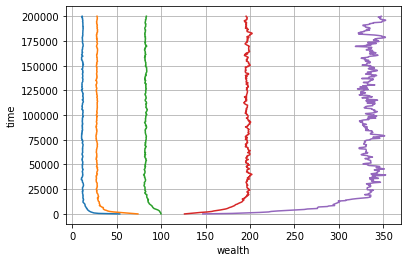

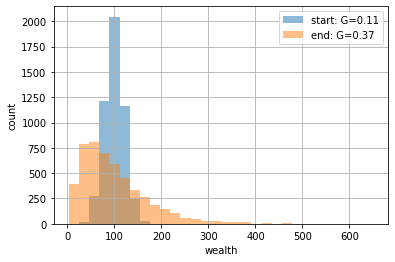

In [20]:
show(samples(random.gauss, MU, MU/5), transaction=redistribute)

## Interpretation
**Eine weitere Überraschung:** Diese Transaktionsfunktion führt zwar zu einer geringeren Ungleichung als `split_randomly` oder `winner_take_all`, erhöht aber überraschenderweise (für mich) die Ungleichung im Vergleich zur ursprünglichen (Gaußschen) Grundgesamtheit.

Hier ist eine weitere Interaktionsfunktion, `status_quo`, bei den beide Akteure die Hälfte ihres Vermögens aus der Transaktion heraushalten und die andere Hälfte mithilfe einer dreieckigen Verteilung zufällig aufgeteilt wir.
In diesem Fall ist das wahrscheinlichste Ergebnis, dass jeder Akteur das Vermögen beibehält, mit dem er begonnen hat. Die Wahrscheinlichkeit für größere Abweichungen vom Status quo wird immer unwahrscheinlicher.

In [21]:
def status_quo(A, B):
    """
    A transaction that is most likely to leave things unchanged, but could move any amount of wealth around.
    """
    a = random.triangular(0, (A + B) / 2, A / 2)
    return (A / 2 + a), (A + B) - (A / 2 + a)

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.11  20.1   53   74  100  125  147
 20,000 0.22  39.1   32   54   95  152  212
 40,000 0.23  41.1   30   52   94  157  217
 60,000 0.22  40.8   31   53   94  154  219
 80,000 0.23  40.7   32   52   94  155  217
100,000 0.22  40.6   33   54   94  156  222
120,000 0.23  41.3   31   52   94  155  219
140,000 0.23  41.1   29   52   94  156  220
160,000 0.22  40.8   30   53   94  155  218
180,000 0.23  41.0   31   53   95  153  221
200,000 0.23  40.8   32   52   95  153  219


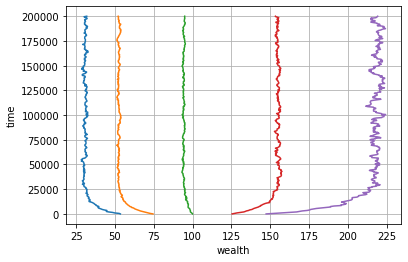

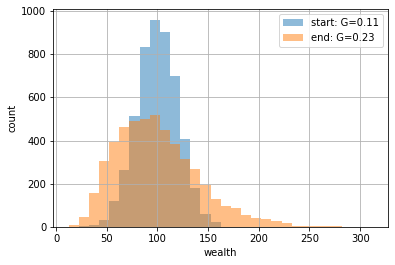

In [22]:
show(samples(random.gauss, MU, MU/5), transaction=status_quo)

Auch die Transaktionsfunktion `status_quo` erhöht die Ungleichheit gegenüber der ursprünglichen Grundgesamtheit, jedoch nicht so sehr wie die anderen Transaktionsfunktionen.

# Quellen 
Diese Notebook basiert auf folgender Quelle: https://nbviewer.jupyter.org/url/norvig.com/ipython/Economics.ipynb